**Mini Project Data Mining**

Kelas Penggalian Data B

Nama Anggota

1. Clarissa Sanindita Reikisyifa (202010370311232)
2. Cheria Rindang Tri Andini (202010370311236)
3. Alviatul Nazilla (202010370311293)



#Import Data

In [ ]:
import pandas as pd
import numpy as np
! pip install kaggle
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from matplotlib import pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.cluster import KMeans
%matplotlib inline
plt.style.use('seaborn-whitegrid')
from sklearn.cluster import KMeans

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<ipython-input-124-db54f53d78b5>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
url = '/content/drive/MyDrive/dataset/songs_normalize.csv'
df = pd.read_csv(url)
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


#EDA

In [ ]:
tahun_hapus = list(range(1998, 2017)) + list(range(2019, 2021))
df = df[~df['year'].isin(tahun_hapus)]
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
46,Samantha Mumba,Gotta Tell You,201946,False,2018,43,0.729,0.632,0,-8.750,0,0.0279,0.191000,0.000000,0.1660,0.774,109.981,pop
175,DB Boulevard,Point Of View - Radio Edit,231166,False,2018,0,0.676,0.715,6,-6.854,1,0.0287,0.002840,0.074600,0.0685,0.275,129.006,Dance/Electronic
766,T2,Heartbroken - Edit,178613,False,2017,59,0.716,0.757,11,-5.438,0,0.0329,0.025800,0.003920,0.1600,0.877,139.986,Dance/Electronic
1088,Scouting For Girls,This Ain't a Love Song,210680,False,2017,52,0.458,0.905,0,-4.157,1,0.0451,0.000431,0.000000,0.3780,0.553,176.667,"pop, rock"
1534,Felix Jaehn,Ain't Nobody (Loves Me Better) (feat. Jasmine ...,186146,False,2018,72,0.778,0.566,2,-6.959,0,0.0311,0.672000,0.000197,0.0698,0.479,117.971,"hip hop, pop, Dance/Electronic"


In [ ]:
df=df.drop(df[df['genre'] == 'set()'].index)

In [ ]:
len(df)

217

In [ ]:
df.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000
mean,211151.410138,2017.488479,62.188940,0.708396,0.666590,5.373272,-5.707226,0.511521,0.118106,0.161041,0.006220,0.158955,0.474822,119.744327
std,37597.018601,0.501023,25.861924,0.131175,0.143567,3.884183,1.932308,0.501023,0.102583,0.193688,0.035469,0.113662,0.204978,26.670404
min,119133.000000,2017.000000,0.000000,0.259000,0.296000,0.000000,-12.890000,0.000000,0.023200,0.000239,0.000000,0.021500,0.079300,64.934000
25%,187957.000000,2017.000000,62.000000,0.614000,0.578000,1.000000,-6.594000,0.000000,0.044900,0.025800,0.000000,0.095000,0.321000,97.985000
50%,207629.000000,2017.000000,72.000000,0.719000,0.680000,5.000000,-5.350000,1.000000,0.075200,0.087600,0.000000,0.117000,0.464000,119.889000
75%,224030.000000,2018.000000,78.000000,0.800000,0.778000,9.000000,-4.333000,1.000000,0.149000,0.223000,0.000013,0.169000,0.632000,139.023000
max,417920.000000,2018.000000,86.000000,0.963000,0.942000,11.000000,-2.384000,1.000000,0.530000,0.934000,0.391000,0.742000,0.966000,203.911000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217 entries, 46 to 1988
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            217 non-null    object 
 1   song              217 non-null    object 
 2   duration_ms       217 non-null    int64  
 3   explicit          217 non-null    bool   
 4   year              217 non-null    int64  
 5   popularity        217 non-null    int64  
 6   danceability      217 non-null    float64
 7   energy            217 non-null    float64
 8   key               217 non-null    int64  
 9   loudness          217 non-null    float64
 10  mode              217 non-null    int64  
 11  speechiness       217 non-null    float64
 12  acousticness      217 non-null    float64
 13  instrumentalness  217 non-null    float64
 14  liveness          217 non-null    float64
 15  valence           217 non-null    float64
 16  tempo             217 non-null    float64


In [ ]:
df_2018 = df[df['year'] == 2018]
df_2017 = df[df['year'] == 2017]

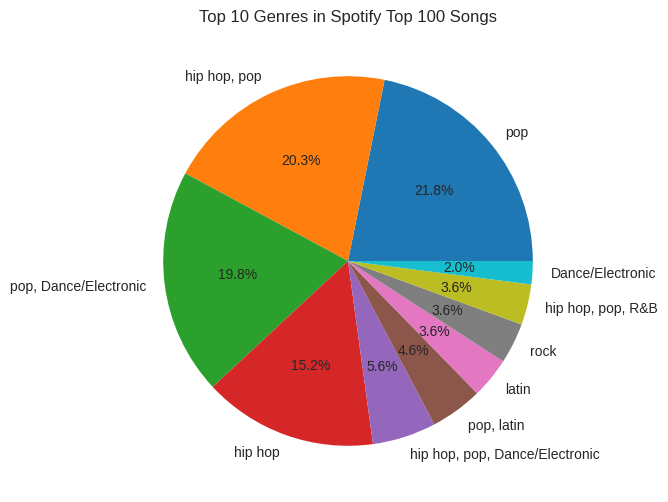

In [ ]:
# Hitung jumlah lagu per genre
genre_counts = df['genre'].value_counts()

# Ambil 10 genre teratas
top_10_genres = genre_counts.head(10)

# Plot diagram pie
plt.figure(figsize=(8, 6))
plt.pie(top_10_genres, labels=top_10_genres.index, autopct='%1.1f%%')
plt.title("Top 10 Genres in Spotify Top 100 Songs")
plt.show()

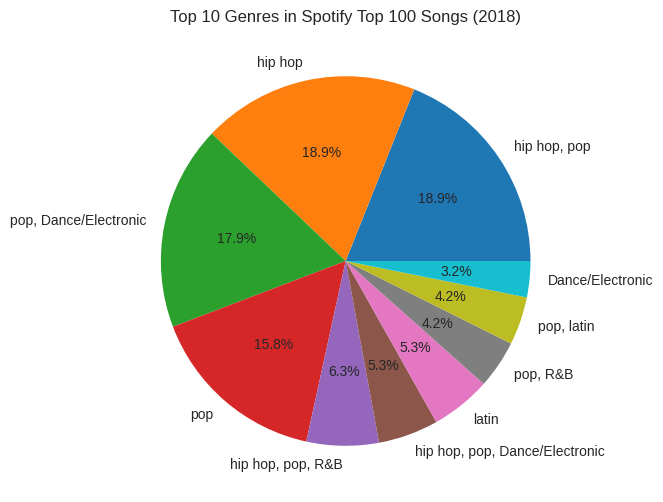

In [ ]:
# Hitung jumlah lagu per genre
genre_counts = df_2018['genre'].value_counts()

# Ambil 10 genre teratas
top_10_genres = genre_counts.head(10)

# Plot diagram pie
plt.figure(figsize=(8, 6))
plt.pie(top_10_genres, labels=top_10_genres.index, autopct='%1.1f%%')
plt.title("Top 10 Genres in Spotify Top 100 Songs (2018)")
plt.show()

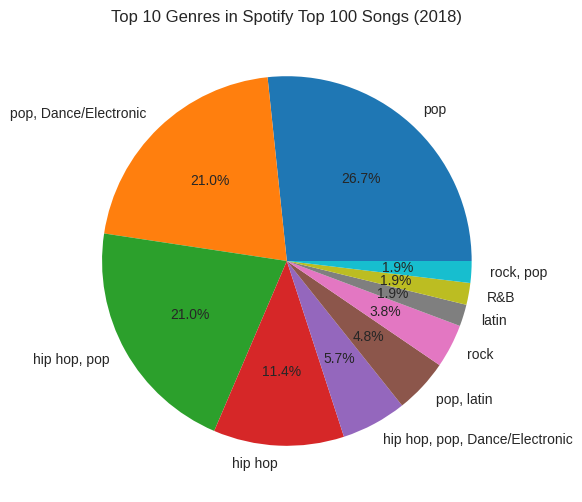

In [ ]:
# Hitung jumlah lagu per genre
genre_counts = df_2017['genre'].value_counts()

# Ambil 10 genre teratas
top_10_genres = genre_counts.head(10)

# Plot diagram pie
plt.figure(figsize=(8, 6))
plt.pie(top_10_genres, labels=top_10_genres.index, autopct='%1.1f%%')
plt.title("Top 10 Genres in Spotify Top 100 Songs (2018)")
plt.show()

In [ ]:
jumlah_musik_per_tahun = df['year'].value_counts().sort_index()
print("Jumlah musik per tahun:")
print(jumlah_musik_per_tahun)

Jumlah musik per tahun:
2017    111
2018    106
Name: year, dtype: int64


In [ ]:
Y = ['duration_ms', 'popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',	'speechiness',	'acousticness',	'instrumentalness', 'liveness',	'valence',	'tempo']
music_df = df[Y]
correlation_matrix = music_df.corr()

correlation_matrix

,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
duration_ms,1.000000,0.010736,0.006053,0.096384,-0.016108,0.112531,0.015198,0.049081,-0.143206,0.026469,-0.003503,-0.119862,0.115200
popularity,0.010736,1.000000,-0.079122,-0.108269,0.133917,-0.050478,0.026807,0.102439,0.126439,-0.073639,0.019936,-0.119111,-0.059528
danceability,0.006053,-0.079122,1.000000,-0.136573,0.096670,0.019408,0.020570,0.212888,-0.055278,-0.158884,-0.143759,0.332772,-0.023635
energy,0.096384,-0.108269,-0.136573,1.000000,-0.086855,0.738798,-0.081449,-0.115877,-0.396191,-0.018999,0.121764,0.406925,0.043962
key,-0.016108,0.133917,0.096670,-0.086855,1.000000,-0.097303,-0.186590,0.035742,0.042097,-0.089211,-0.148758,0.035325,-0.056761
loudness,0.112531,-0.050478,0.019408,0.738798,-0.097303,1.000000,-0.047074,-0.183118,-0.302215,-0.249490,0.033672,0.418198,-0.035316
mode,0.015198,0.026807,0.020570,-0.081449,-0.186590,-0.047074,1.000000,-0.051264,-0.031317,-0.018852,-0.005913,-0.118526,0.085645
speechiness,0.049081,0.102439,0.212888,-0.115877,0.035742,-0.183118,-0.051264,1.000000,-0.130063,-0.086132,-0.045471,-0.050757,0.152606
acousticness,-0.143206,0.126439,-0.055278,-0.396191,0.042097,-0.302215,-0.031317,-0.130063,1.000000,-0.069478,-0.143960,-0.001024,-0.136066
instrumentalness,0.026469,-0.073639,-0.158884,-0.018999,-0.089211,-0.249490,-0.018852,-0.086132,-0.069478,1.000000,-0.050014,-0.124574,0.031567


#Pre Procesing

In [ ]:
# Pilih kolom yang akan dinormalisasi
col_norm = ['duration_ms', 'popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',	'speechiness',	'acousticness',	'instrumentalness', 'liveness',	'valence',	'tempo']  # Ganti dengan nama kolom yang ingin Anda normalisasi

scaler = MinMaxScaler()
df[col_norm] = scaler.fit_transform(df[col_norm])
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
46,Samantha Mumba,Gotta Tell You,0.277164,False,2018,0.500000,0.667614,0.520124,0.000000,0.394061,0.0,0.009274,0.204293,0.000000,0.200555,0.783467,0.324133,pop
175,DB Boulevard,Point Of View - Radio Edit,0.374959,False,2018,0.000000,0.592330,0.648607,0.545455,0.574529,1.0,0.010852,0.002786,0.190793,0.065232,0.220706,0.461026,Dance/Electronic
766,T2,Heartbroken - Edit,0.199072,False,2017,0.686047,0.649148,0.713622,1.000000,0.709309,0.0,0.019140,0.027374,0.010026,0.192228,0.899628,0.540032,Dance/Electronic
1088,Scouting For Girls,This Ain't a Love Song,0.306396,False,2017,0.604651,0.282670,0.942724,0.000000,0.831239,1.0,0.043212,0.000206,0.000000,0.494795,0.534228,0.803968,"pop, rock"
1534,Felix Jaehn,Ain't Nobody (Loves Me Better) (feat. Jasmine ...,0.224284,False,2018,0.837209,0.737216,0.417957,0.181818,0.564535,0.0,0.015588,0.719414,0.000504,0.067037,0.450773,0.381624,"hip hop, pop, Dance/Electronic"


#Cluster Analis

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

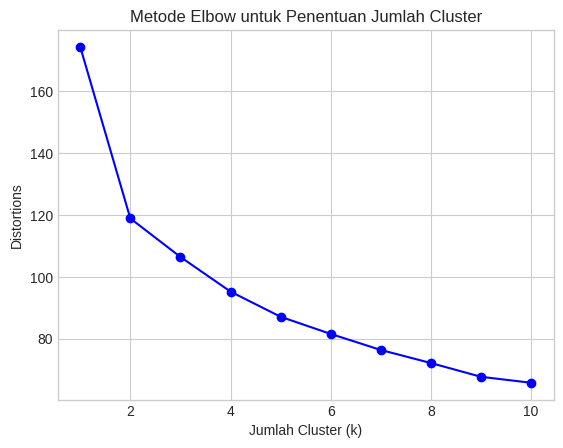

In [ ]:
Y = ['duration_ms', 'popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',	'speechiness',	'acousticness',	'instrumentalness', 'liveness',	'valence',	'tempo']
X = df[Y].values

k_values = range(1, 11)
distortions = []

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

plt.plot(k_values, distortions, 'bo-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Distortions')
plt.title('Metode Elbow untuk Penentuan Jumlah Cluster')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

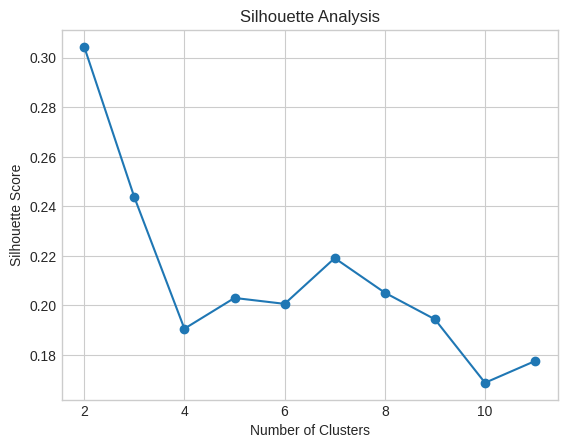

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Menentukan jumlah cluster dengan Silhouette Analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
silhouette_scores = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    score = silhouette_score(X, preds)
    silhouette_scores.append(score)

# Membuat grafik Silhouette Plot
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()


In [ ]:
for n_clusters in range_n_clusters:
  clusterer = KMeans(n_clusters=n_clusters)
  preds = clusterer.fit_predict(X)
  score = silhouette_score(X, preds)
  silhouette_scores.append(score)
  print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

For n_clusters = 2, silhouette score is 0.3043795579664151)
For n_clusters = 3, silhouette score is 0.24387257332570095)
For n_clusters = 4, silhouette score is 0.19055711737317876)
For n_clusters = 5, silhouette score is 0.18879573155953516)
For n_clusters = 6, silhouette score is 0.20571783030320315)
For n_clusters = 7, silhouette score is 0.21588057168815294)
For n_clusters = 8, silhouette score is 0.21564245204022595)
For n_clusters = 9, silhouette score is 0.19340043388342423)
For n_clusters = 10, silhouette score is 0.19971431158670486)
For n_clusters = 11, silhouette score is 0.18489203897999917)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-142-15b586413f70>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2017['Cluster'] = labels


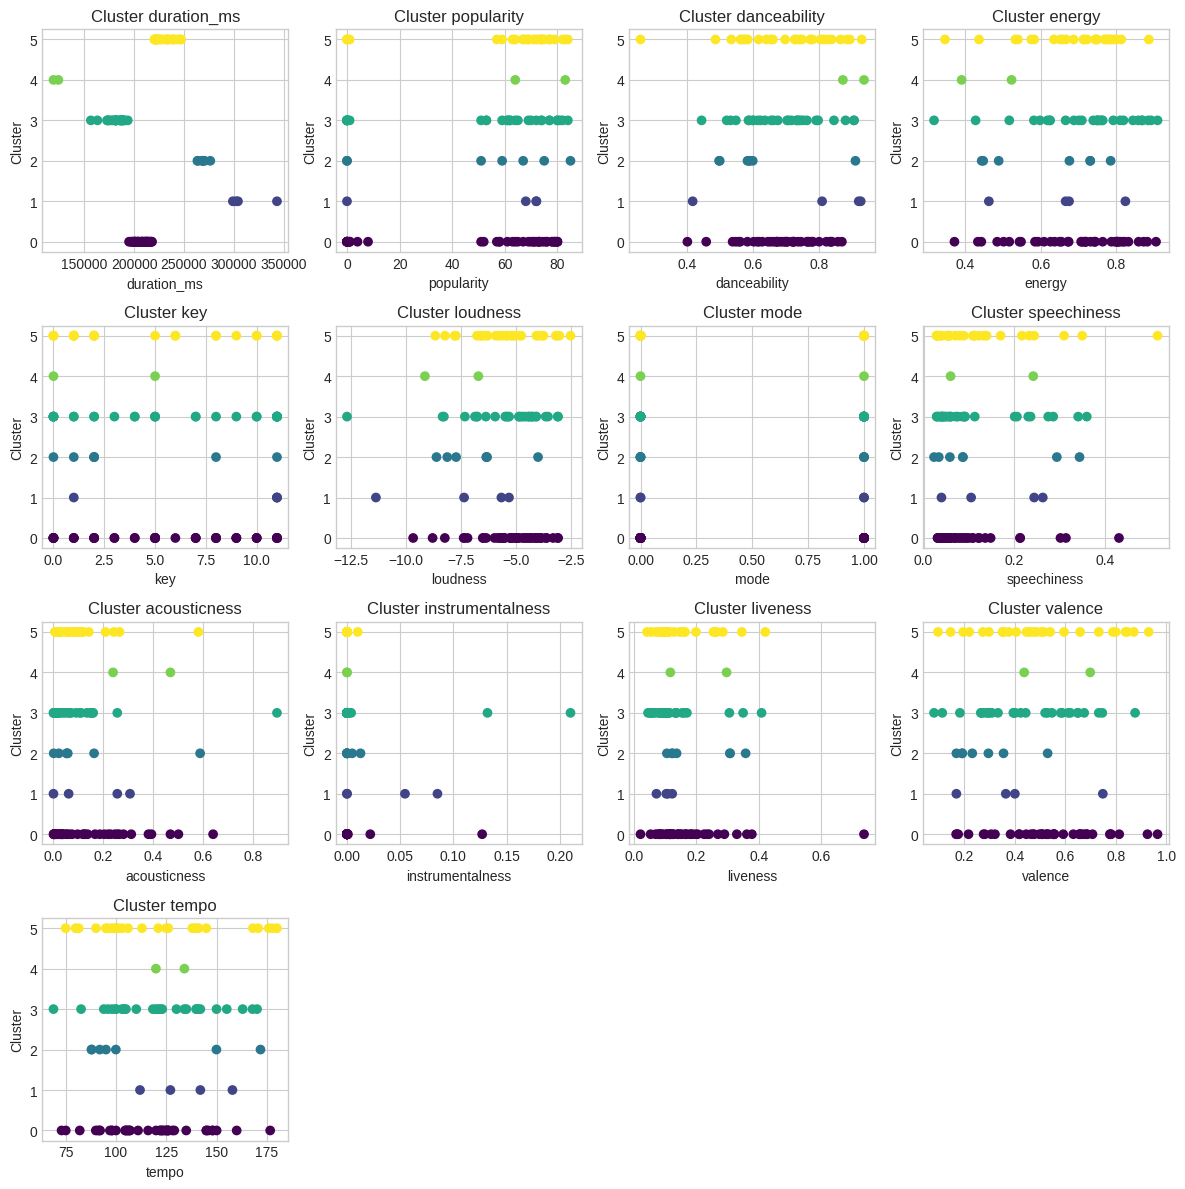

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Atribut lagu yang ingin digunakan
Y = ['duration_ms', 'popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
X = df_2017[Y].values

# Jumlah cluster yang diinginkan
num_clusters = 6

# Melakukan KMeans clustering
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(X)

# Mendapatkan label cluster untuk setiap data
labels = kmeans.labels_
df_2017['Cluster'] = labels

# Menampilkan distribusi cluster pada setiap atribut dalam ukuran grid 3x6
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12, 12))

for i, ax in enumerate(axes.flatten()):
  if i < len(Y):
        ax.scatter(df_2017[Y[i]], df_2017['Cluster'], c=df_2017['Cluster'], cmap='viridis')
        ax.set_xlabel(Y[i])
        ax.set_ylabel('Cluster')
        ax.set_title(f'Cluster {Y[i]}')
  else:
        ax.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# Menghitung jumlah lagu dalam setiap klaster
cluster_counts = df_2017['Cluster'].value_counts().sort_index().reset_index()
cluster_counts.columns = ['Cluster', 'Number of Songs']

# Menghitung rata-rata dari setiap atribut dalam setiap klaster
cluster_means = df_2017.groupby('Cluster')[Y].mean().round(2)

# Menggabungkan informasi jumlah lagu dan rata-rata atribut dalam satu tabel
table = cluster_counts.merge(cluster_means, on='Cluster')
table.set_index('Cluster', inplace=True)

table

,Number of Songs,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
Cluster,,,,,,,,,,,,,,
0,42,207211.52,50.40,0.69,0.69,5.38,-5.26,0.40,0.09,0.14,0.00,0.17,0.54,117.35
1,4,312069.25,53.00,0.77,0.66,8.50,-7.43,0.50,0.16,0.16,0.03,0.10,0.42,134.74
2,7,268607.29,48.14,0.61,0.61,3.71,-6.78,0.43,0.13,0.13,0.00,0.21,0.28,112.09
3,29,181686.69,52.14,0.69,0.72,5.90,-5.44,0.55,0.12,0.09,0.01,0.13,0.45,122.02
4,2,121594.00,73.50,0.90,0.46,2.50,-7.93,0.50,0.15,0.35,0.00,0.21,0.57,126.95
5,27,230548.30,61.33,0.69,0.69,4.52,-5.39,0.44,0.13,0.10,0.00,0.15,0.50,121.71


In [ ]:
df_2017['Cluster'] = labels

# Menghitung jumlah tiap genre dalam tiap klaster
genre_cluster_counts = pd.crosstab(df_2017['genre'], df_2017['Cluster'])

# Menampilkan hasil perhitungan
genre_cluster_counts

<ipython-input-144-6d80961dbc6e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2017['Cluster'] = labels


Cluster,0,1,2,3,4,5
genre,,,,,,
Dance/Electronic,0,0,0,1,0,0
R&B,1,0,0,0,0,1
easy listening,0,1,0,0,0,0
hip hop,2,0,1,4,2,3
"hip hop, Dance/Electronic",0,0,0,1,0,0
"hip hop, pop",6,2,3,3,0,8
"hip hop, pop, Dance/Electronic",5,0,0,0,0,1
"hip hop, pop, R&B",0,1,0,0,0,0
latin,1,0,0,1,0,0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-150-794d867b2d72>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['Cluster'] = labels


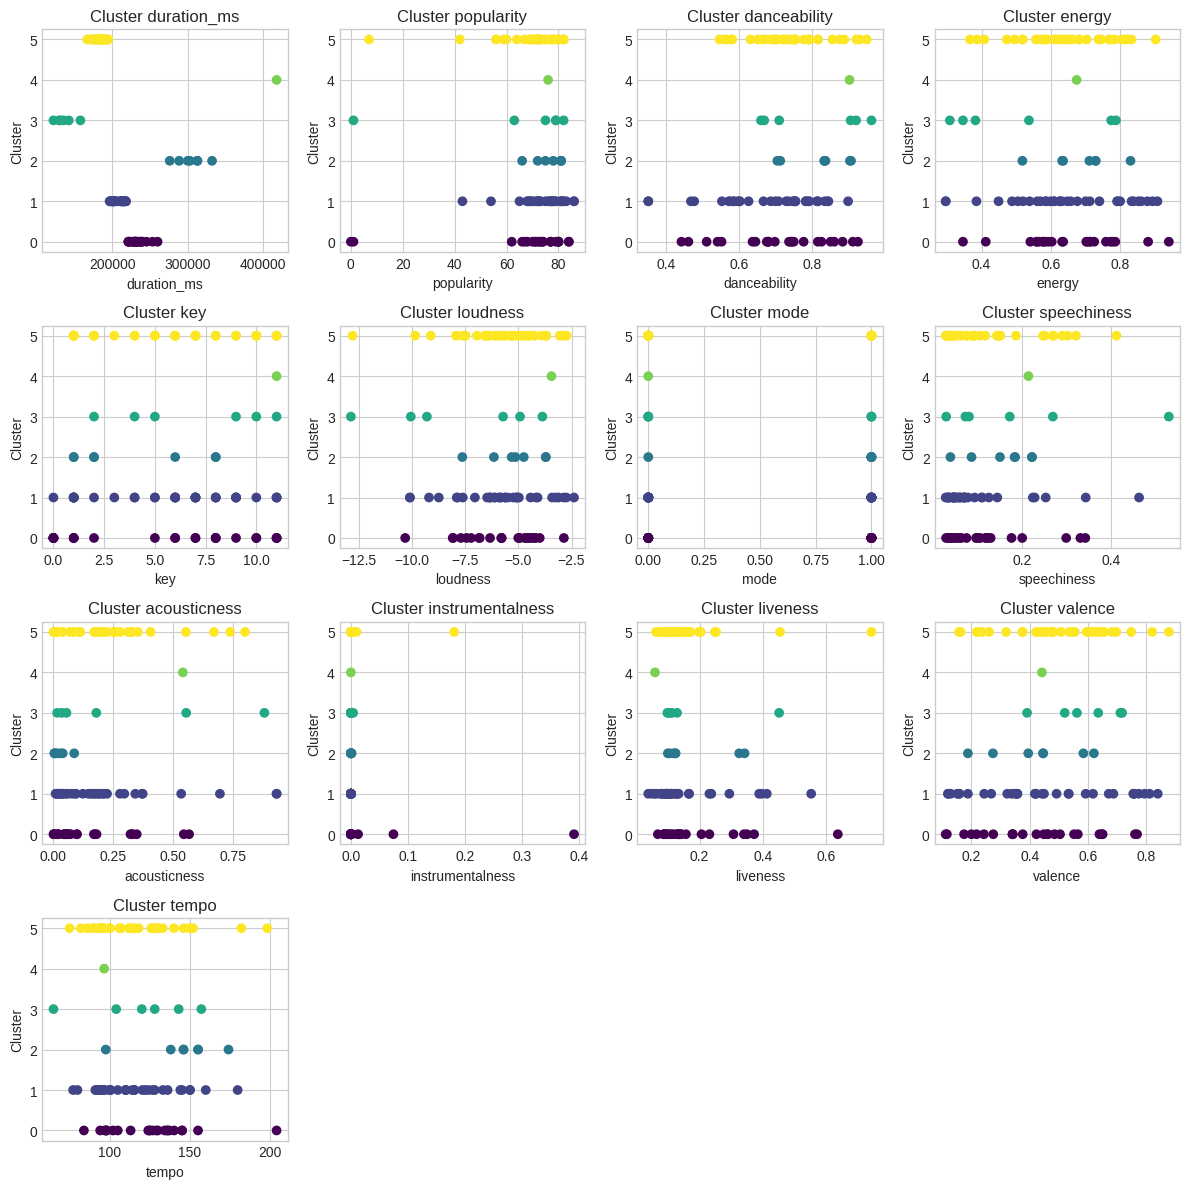

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Atribut lagu yang ingin digunakan
Y = ['duration_ms', 'popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
X = df_2018[Y].values

# Jumlah cluster yang diinginkan
num_clusters = 6

# Melakukan KMeans clustering
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(X)

# Mendapatkan label cluster untuk setiap data
labels = kmeans.labels_
df_2018['Cluster'] = labels

# Menampilkan distribusi cluster pada setiap atribut dalam ukuran grid 3x6
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12, 12))

for i, ax in enumerate(axes.flatten()):
  if i < len(Y):
        ax.scatter(df_2018[Y[i]], df_2018['Cluster'], c=df_2018['Cluster'], cmap='viridis')
        ax.set_xlabel(Y[i])
        ax.set_ylabel('Cluster')
        ax.set_title(f'Cluster {Y[i]}')
  else:
        ax.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# Menghitung jumlah lagu dalam setiap klaster
cluster_counts = df_2018['Cluster'].value_counts().sort_index().reset_index()
cluster_counts.columns = ['Cluster', 'Number of Songs']

# Menghitung rata-rata dari setiap atribut dalam setiap klaster
cluster_means = df_2018.groupby('Cluster')[Y].mean().round(2)

# Menggabungkan informasi jumlah lagu dan rata-rata atribut dalam satu tabel
table = cluster_counts.merge(cluster_means, on='Cluster')
table.set_index('Cluster', inplace=True)

table

,Number of Songs,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
Cluster,,,,,,,,,,,,,,
0,24,232948.08,68.33,0.71,0.65,5.08,-5.80,0.62,0.12,0.15,0.02,0.18,0.42,124.18
1,34,207601.47,74.15,0.68,0.65,5.65,-5.79,0.53,0.10,0.22,0.00,0.15,0.45,114.88
2,7,303678.14,76.29,0.82,0.68,4.00,-5.21,0.86,0.16,0.03,0.00,0.18,0.42,144.48
3,6,136203.33,63.17,0.80,0.52,6.83,-7.80,0.50,0.19,0.29,0.00,0.17,0.59,119.48
4,1,417920.00,76.00,0.90,0.68,11.00,-3.44,0.00,0.21,0.54,0.00,0.06,0.44,96.51
5,34,183571.97,69.53,0.74,0.64,5.53,-5.84,0.53,0.13,0.24,0.01,0.16,0.49,115.96


In [ ]:
df_2018.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,Cluster
46,Samantha Mumba,Gotta Tell You,201946,False,2018,43,0.729,0.632,0,-8.750,0,0.0279,0.19100,0.000000,0.1660,0.774,109.981,pop,1
175,DB Boulevard,Point Of View - Radio Edit,231166,False,2018,0,0.676,0.715,6,-6.854,1,0.0287,0.00284,0.074600,0.0685,0.275,129.006,Dance/Electronic,0
1534,Felix Jaehn,Ain't Nobody (Loves Me Better) (feat. Jasmine ...,186146,False,2018,72,0.778,0.566,2,-6.959,0,0.0311,0.67200,0.000197,0.0698,0.479,117.971,"hip hop, pop, Dance/Electronic",5
1592,Sigala,Easy Love,229813,False,2018,66,0.680,0.942,9,-4.208,1,0.0631,0.17500,0.001300,0.1170,0.647,123.976,"pop, Dance/Electronic",0
1630,Alan Walker,Faded,212106,False,2018,78,0.468,0.627,6,-5.085,1,0.0476,0.02810,0.000008,0.1100,0.159,179.642,Dance/Electronic,1


In [ ]:
df_2018['genre'].unique()

array(['pop', 'Dance/Electronic', 'hip hop, pop, Dance/Electronic',
       'pop, Dance/Electronic', 'hip hop, pop', 'rock',
       'hip hop, pop, R&B', 'hip hop', 'hip hop, Dance/Electronic',
       'pop, R&B', 'latin', 'pop, latin', 'pop, rock, Dance/Electronic',
       'rock, pop, Dance/Electronic', 'pop, rock', 'rock, pop'],
      dtype=object)

In [ ]:
df_2018['Cluster'] = labels

# Menghitung jumlah tiap genre dalam tiap klaster
genre_cluster_counts = pd.crosstab(df_2018['genre'], df_2018['Cluster'])

# Menampilkan hasil perhitungan
print(genre_cluster_counts)

Cluster                         0  1  2  3  4  5
genre                                           
Dance/Electronic                1  1  0  0  0  1
hip hop                         6  1  1  5  0  5
hip hop, Dance/Electronic       0  0  2  0  0  1
hip hop, pop                    7  2  3  0  0  6
hip hop, pop, Dance/Electronic  0  2  0  0  0  3
hip hop, pop, R&B               1  5  0  0  0  0
latin                           0  2  0  0  1  2
pop                             3  9  0  0  0  3
pop, Dance/Electronic           2  9  0  1  0  5
pop, R&B                        2  2  0  0  0  0
pop, latin                      2  1  0  0  0  1
pop, rock                       0  0  0  0  0  1
pop, rock, Dance/Electronic     0  0  0  0  0  1
rock                            0  0  1  0  0  2
rock, pop                       0  0  0  0  0  1
rock, pop, Dance/Electronic     0  0  0  0  0  2


<ipython-input-154-7f4cf9cf495d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['Cluster'] = labels
